# Titanic Survival Analysis

## Introduction

This project explores the Titanic dataset to uncover patterns and factors that influenced passenger survival during the tragic 1912 sinking.  
By analyzing demographic, ticket, and survival data, we aim to draw actionable insights using Python, Pandas, and Tableau.  
Our final goal is to communicate findings through visualizations and a structured presentation.


## 1. Business Understanding

The sinking of the RMS Titanic in 1912 is one of the most infamous maritime disasters in history. This dataset provides detailed information on the passengers aboard the Titanic, such as age, gender, ticket class, and whether they survived.

The goal of this analysis is to apply data science techniques to gain insights into the factors that influenced survival rates. Specifically, we aim to answer questions like:

- Did gender or age affect a passenger's chance of survival?
- Were passengers in certain classes more likely to survive?
- What role did family size or port of embarkation play?

Understanding these patterns is important not only for historical interest but also for developing predictive models that can simulate or explain survival in similar scenarios.
ondieki frank
22:17
This project will go through the stages of:
- Cleaning and preparing the data,
- Performing exploratory data analysis (EDA),
- Generating key insights,
- And finally, visualizing and communicating findings through Tableau dashboards and a summary presentation.

By the end of this analysis, we aim to have a clear, data-driven perspective on the demographics and conditions that most significantly impacted survival on the Titanic.


# 2. Data Understanding

The dataset used for this analysis is the Titanic Passenger Data, famously used in data science and machine learning education. It contains detailed information about passengers aboard the Titanic, including demographics, ticket details, and survival status.

### Dataset Overview

- **Total Rows:** 891
- **Total Columns:** 12

### 🧾 Column Descriptions
| Column        | Description |
|---------------|-------------|
| `PassengerId` | Unique ID for each passenger |
| `Survived`    | Survival status (0 = No, 1 = Yes) |
| `Pclass`      | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) |
| `Name`        | Full name of the passenger |
| `Sex`         | Gender |
| `Age`         | Age in years |
| `SibSp`       | # of siblings/spouses aboard the Titanic |
| `Parch`       | # of parents/children aboard the Titanic |
| `Ticket`      | Ticket number |
| `Fare`        | Passenger fare |
| `Cabin`       | Cabin number |
| `Embarked`    | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) |

### Initial Observations

- Some features contain missing values, notably `Age`, `Cabin`, and `Embarked`.
- The `Survived` column will serve as our target variable for analysis.
- A mix of categorical and numerical features will require appropriate handling.

Before proceeding to data cleaning, we will perform basic exploration to better understand the data structure and potential challenges.

# 3. Data Cleaning

In this section, we will clean the Titanic dataset by:

- Checking for missing values
- Handling missing data appropriately
- Converting categorical variables into usable formats
- Ensuring data types are appropriate

These steps are crucial for accurate analysis and modeling later on.

### Load Dataset and Inspect


In [2]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plots to show inline in Jupyter
%matplotlib inline

# Set style for plots
sns.set(style="whitegrid")

# Load the dataset from the 'Datasets' folder inside your project
df = pd.read_csv("/home/frank/Flatiron/Assignments/Phase_2/Group_1/Project_Titanic/Project_Titanic/Datasets/Titanic-Dataset.csv")

# Preview the first few rows of the dataset
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1: Check for missing values

In [4]:
# Check for missing values in each column
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 2: Drop the 'Cabin' column due to too many missing values

In [5]:
# Drop the 'Cabin' column as it contains too many missing values
df.drop(columns='Cabin', inplace=True)


### 3: Fill missing values in 'Age' with the median age

In [6]:
# Fill missing values in 'Age' column with the median
df['Age'].fillna(df['Age'].median(), inplace=True)


### 4: Fill missing values in 'Embarked' with the mode

In [7]:
# Fill missing values in 'Embarked' column with the most frequent value (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

### 5: Encode 'Sex' and 'Embarked' columns

**Statistical Insight:**

Sex and Embarked are categorical; converting them to binary allows for correlation/regression analysis later.

In [9]:
# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

## Empower our Tableau Member
Save a CSV copy:

In [10]:
# Step 6: Save the cleaned dataset for Tableau and future use
df.to_csv('Datasets/cleaned_titanic.csv', index=False)


# Step 4: Exploratory Data Analysis (EDA) + Statistics

## Cell 1: Statistical Summary of Dataset

### Concepts Applied:

**Concepts Applied:**

- Mean: Average (e.g., average fare).

- Standard deviation (std): Spread of values — high std means more spread.

- 25%, 50%, 75%: Quartiles used in identifying outliers (via IQR)

In [9]:
# Statistical summary of numerical features
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.647587,0.086420,0.725028
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.477990,0.281141,0.446751
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


## Step 4.2: Check for Outliers using Boxplots

**Why?**
To visually inspect outliers that might skew analysis.


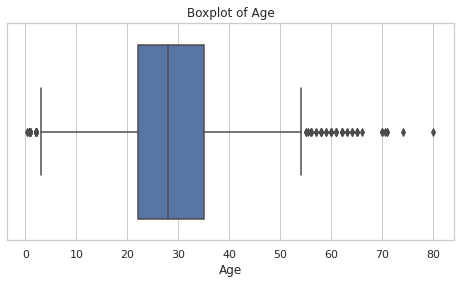

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Age
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.show()


**Boxplot Interpretation for Age**
- Box (middle 50%): The box shows the interquartile range (IQR) from Q1 (~20s) to Q3 (~38).

- Line in box: Median age (~28–30 years).

- Whiskers: Extend to the smallest and largest values within 1.5 * IQR.

- Dots outside whiskers: These are outliers (very young or older passengers).

**Actionable Insights**
- Titanic passengers were mostly young adults.

- There are notable outliers, such as children under 5 and adults over 60.




**Handling Outliers**


In [12]:
# Option 1: View outlier values
outliers = df[df['Age'] > 60]
outliers[['Age', 'Survived']]

# Option 2: Cap age outliers at 60 if needed
df['Age'] = df['Age'].apply(lambda x: 60 if x > 60 else x)



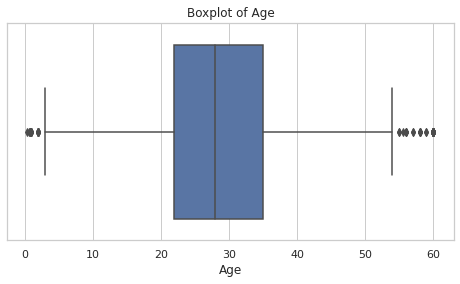

In [13]:
# Boxplot for Age
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.show()

## Step 4.3: Correlation Matrix
 **Why?**
To explore linear relationships between numeric features. Strong correlations might suggest multicollinearity or causation (if justified).

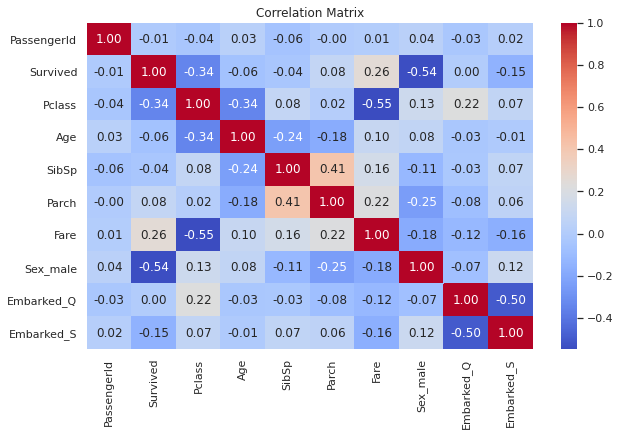

In [14]:
# Compute and visualize correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


## Interpreting the Correlation Matrix (Pearson r values)
### Focus on Survived correlations:
Sex_male: -0.54 → strong negative correlation
→ Males were less likely to survive .

Pclass: -0.34 → moderate negative correlation
→ Higher class (1st class) increased survival chances.

Fare: 0.26 → mild positive correlation
→ People who paid higher fare had slightly higher survival.

Parch & SibSp: ~0.08 & ~-0.06
→ Very weak to no correlation.

### Insights for Modeling:
Sex and Pclass are key predictors.

Fare could be mildly useful.

PassengerId has no correlation — can be dropped.

## Step 4.4: Covariance
 **Why?**
To understand how two variables vary together (e.g., Age and Fare).

In [15]:
# Covariance between Age and Fare
df[['Age', 'Fare']].cov()


,Age,Fare
Age,158.875268,61.898114
Fare,61.898114,2469.436846


## Interpretation:
Cov(Age, Fare) = 61.90 → This is a positive covariance, meaning:

As Age increases, Fare tends to increase slightly.

This could suggest that older passengers may have been more likely to afford higher-class tickets, though we’d want to verify that further.

However, covariance has no standard scale, so the correlation (which you’ve already done) is often more interpretable for comparing strength.



## Step 4.5: Probability Mass Function (PMF) for Discrete Variable
**Why?**
To see the distribution of probabilities for discrete variables like Pclass or SibSp.

The **PMF** gives the probability of each possible outcome for a **discrete variable**. It's especially useful to understand how frequently each class appears.

In this case, we’ll compute the PMF for the **Passenger Class (Pclass)** to understand the class distribution on the Titanic.

 **PMF Formula:**  
PMF(x) = P(X = x) = (Number of occurrences of x) / (Total observations)

We'll express this as percentages for better interpretation.

In [16]:
# PMF for Pclass
(df['Pclass'].value_counts(normalize=True) * 100).round(2)


3    55.11
1    24.24
2    20.65
Name: Pclass, dtype: float64

## Interpretation:
- 3rd Class: 55.11% of passengers — the majority.

- 1st Class: 24.24% — wealthier passengers.

- 2nd Class: 20.65% — middle-tier.

This shows most people were traveling in third class, which could be a key factor when analyzing survival rates or economic differences.

## Step 4.6: Cumulative Distribution Function (CDF) for Age
**Why?**
To understand probabilities less than or equal to a value, e.g., what percentage of passengers are under 30.

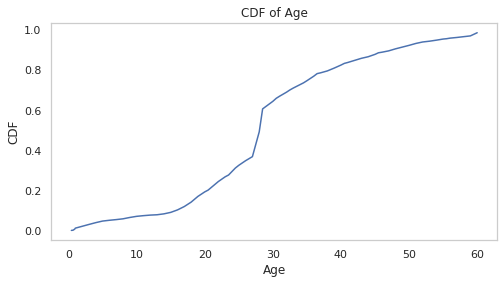

In [17]:
# CDF for Age
age_sorted = df['Age'].dropna().sort_values()
cdf = age_sorted.rank(method='average', pct=True)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(age_sorted, cdf)
plt.title("CDF of Age")
plt.xlabel("Age")
plt.ylabel("CDF")
plt.grid()
plt.show()


- The Cumulative Distribution Function (CDF) shows the proportion of individuals below a given age. From the graph:

- Around 60% of individuals are aged below 30.

- The curve steepens between ages 25–30, indicating a large number of individuals in this age range.

- About 90% are aged below 55, showing a small portion are older.

- This plot helps us understand how age is distributed across the population.


## Step 4.7: Hypothesis Testing — Chi-Square Test of Independence (Gender vs Survival)

 **Objective:**  
To determine if there's a statistically significant relationship between a passenger’s **gender** and their **chance of survival** on the Titanic.

---

 **Hypotheses**  
- **Null Hypothesis (H₀):** Survival is **independent** of gender (no relationship).
- **Alternative Hypothesis (H₁):** Survival is **dependent** on gender (there is a relationship).

---
 **Method:**  
We use the **Chi-Square Test of Independence** with a **contingency table** built from the `Sex` and `Survived` columns.

 **Significance Level (α):** 0.05


In [19]:
# Step 4.7: Hypothesis Testing — Chi-Square for Gender vs Survival

from scipy.stats import chi2_contingency

# Recreate 'Sex' column for testing purposes
df['Sex'] = df['Sex_male'].apply(lambda x: 'male' if x == 1 else 'female')

# Create a contingency table
contingency = pd.crosstab(df['Sex'], df['Survived'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

# Output the results
print("Contingency Table:\n", contingency)
print(f"\nChi2 = {chi2:.3f}, p-value = {p:.4f}")



Contingency Table:
 Survived    0    1
Sex               
female     81  233
male      468  109

Chi2 = 260.717, p-value = 0.0000


-  **Contingency Table**:
  
  | Gender | Did Not Survive | Survived |
  |--------|------------------|----------|
  | Female | 81               | 233      |
  | Male   | 468              | 109      |

-  **Chi2 Statistic** = 260.717  
-  **p-value** = 0.0000

---

 **Conclusion**:  
Since the **p-value < 0.05**, we **reject the null hypothesis**.  
This strongly suggests that **gender and survival are dependent**, meaning **gender had a significant effect on survival** — supporting the "women and children first" survival bias.


### Step 4.8: ANOVA — Fare vs Survival

 **Purpose:**  
To test whether the **mean Fare** paid by survivors differs from the Fare paid by non-survivors.
**Why ANOVA?**
ANOVA helps us compare the means of a continuous variable (Fare) across two or more groups (Survived = 0 or 1).
This is useful to test whether passengers who survived paid significantly more (or less) than those who didn’t.

 **Hypothesis**
Null Hypothesis (H₀): The average fare is the same for both survival groups.

Alternative Hypothesis (H₁): The average fare differs between survival groups.

In [20]:
# Step 4.8: ANOVA — Comparing mean fare between survivors and non-survivors
from scipy.stats import f_oneway

# Split Fare data into two groups: survived and not survived
fare_survived = df[df['Survived'] == 1]['Fare']
fare_not_survived = df[df['Survived'] == 0]['Fare']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(fare_survived, fare_not_survived)

# Display results
print(f"F-statistic: {f_stat:.2f}")
print(f"p-value: {p_value:.4f}")


F-statistic: 63.03
p-value: 0.0000


**Results:**

- **F-statistic:** 63.03  
- **p-value:** 0.0000

---

 **Conclusion:**  
Because the p-value is **far less than 0.05**, we **reject the null hypothesis**.

This means that **there is a statistically significant difference in the average fare paid** by passengers who survived versus those who did not.  

It suggests that **fare (possibly linked with class or socioeconomic status)** may have had an impact on survival probability.

### Step 4.9: ANOVA — Fare Across Passenger Classes
**Objective**  
To determine if there is a statistically significant difference in the average Fare across the three Passenger Classes (`Pclass`).

---

 **Hypotheses**  
- **Null Hypothesis (H₀):** Mean Fare is equal across all Pclass groups (1st, 2nd, 3rd).
- **Alternative Hypothesis (H₁):** At least one group has a different average Fare.

In [21]:
# Step 4.9: ANOVA — Compare Fare across Pclass (1, 2, 3)
from scipy.stats import f_oneway

# Group Fare values by Pclass
fare_class1 = df[df['Pclass'] == 1]['Fare']
fare_class2 = df[df['Pclass'] == 2]['Fare']
fare_class3 = df[df['Pclass'] == 3]['Fare']

# Run one-way ANOVA
f_stat_pclass, p_val_pclass = f_oneway(fare_class1, fare_class2, fare_class3)

# Display results
print(f"F-statistic: {f_stat_pclass:.2f}")
print(f"p-value: {p_val_pclass:.4f}")


F-statistic: 242.34
p-value: 0.0000


 Results:
- **F-statistic:** 242.34  
- **p-value:** 0.0000

 **Interpretation:**  
Since the p-value is much smaller than 0.05, we reject the null hypothesis.  
This means **ticket prices are significantly different across the classes**, with 1st class passengers generally paying more. This supports the idea that **socio-economic status influenced survival and experience aboard**.

# Step 5: Visualizations
We'll create targeted plots that visually validate the results of our hypothesis testing. Each visualization will correspond to a specific test or question answered in Step 4.

## 5.1: Survival by Gender (Visualizing Chi-Square Result)
**Objective:**
To visually examine the relationship between gender and survival status, supporting the Chi-Square Test result.

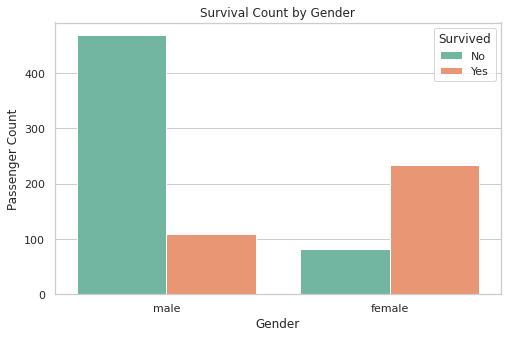

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the visual style
sns.set(style="whitegrid")

# Plot: Survival count by gender
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set2')

# Add titles and labels
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

# Display the plot
plt.show()


## Interpretation of "Survival Count by Gender" Plot:
**The plot clearly shows a strong disparity in survival rates between genders:**

- A majority of males did not survive the Titanic disaster.

- In contrast, most females survived.

- This dramatic difference aligns with the “women and children first” protocol used during the evacuation.

This visual supports our earlier Chi-Square Test, which showed a statistically significant relationship between gender and survival.

## 5.2: Fare by Survival Status (Visualizing ANOVA Result)
**Objective:**
To visually compare fare distributions for passengers who survived vs. did not survive, supporting ANOVA findings.



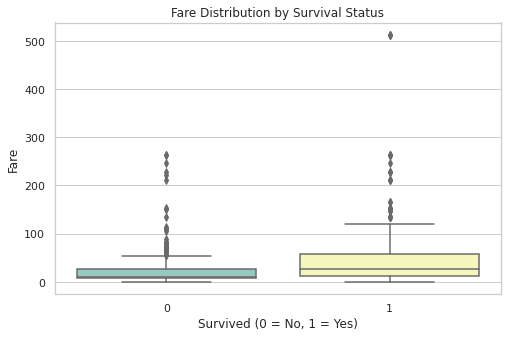

In [4]:
# Plot: Fare distribution by survival status
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Survived', y='Fare', palette='Set3')

# Add titles and labels
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')

# Display the plot
plt.show()


## Interpretation of the Boxplot: Fare Distribution by Survival Status
This boxplot compares fare amounts paid by passengers who did not survive (0) versus those who survived (1).

### Key Observations:
- Survivors (1) generally paid higher fares, as seen by the higher median and upper quartile.

- Non-survivors (0) mostly paid lower fares.

- There are significant outliers in both groups, especially among survivors (some paid over 500).

- The distribution is right-skewed, especially for the survived group, indicating a few high-paying passengers survived.

**Implication:**
Fare may be positively correlated with survival, suggesting socio-economic status (SES) could have influenced survival chances — richer passengers (likely in higher classes) had better access to lifeboats.

## Step 5.3: ANOVA — Fare Across Passenger Classes
We'll now test if Fare differs significantly across the 3 Passenger Classes (Pclass).

### Goal:
Determine if the average fare is statistically different across Pclass 1, 2, and 3.

**Hypotheses:**
- H₀ (Null): Mean Fare is equal across all Pclass groups.

- H₁ (Alt): At least one group has a different average Fare.

In [5]:
from scipy.stats import f_oneway

# Group fare values by passenger class
fare_class1 = df[df['Pclass'] == 1]['Fare']
fare_class2 = df[df['Pclass'] == 2]['Fare']
fare_class3 = df[df['Pclass'] == 3]['Fare']

# Run one-way ANOVA
f_stat_pclass, p_val_pclass = f_oneway(fare_class1, fare_class2, fare_class3)

# Output results
print(f"F-statistic: {f_stat_pclass:.2f}")
print(f"p-value: {p_val_pclass:.4f}")


F-statistic: 242.34
p-value: 0.0000


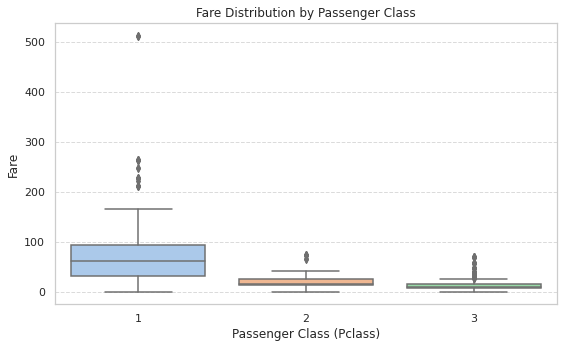

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='pastel')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Fare')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Interpretation for Report / Notebook:
The ANOVA test returned an F-statistic of 242.34 with a p-value of 0.0000, indicating a statistically significant difference in average fares between passenger classes. The boxplot further confirms this, showing clear separation in fare distributions, with 1st class passengers paying the most.


**This supports the hypothesis that socio-economic class (Pclass) influenced ticket pricing, which may also relate to survival chances aboard the Titanic.**

## 5.4 Age Distribution by Survival Status
Objective: Visualize how age varies between survivors and non-survivors to explore if age impacted survival.


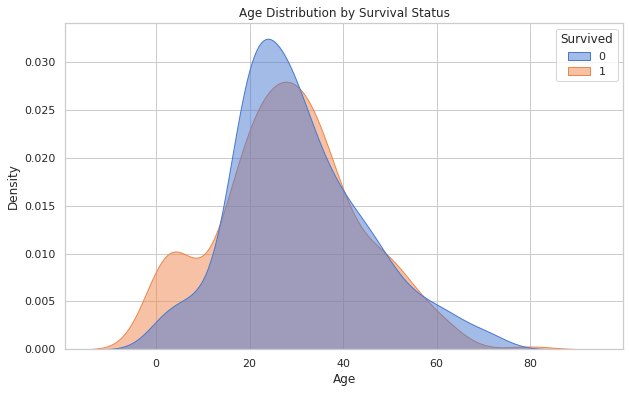

In [7]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True, common_norm=False, palette='muted', alpha=0.5)

plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


## Age Distribution by Survival Status – Key Insights:
- Children (age < 10) had a higher survival rate.

- Young adults (age ~20–30) were the largest group, but many did not survive.

- Older passengers (age 60+) had a low chance of survival.

- Ages 20–50 show similar survival and non-survival patterns — mixed outcomes.

- Overall, survival decreases with age, especially after age 50.

## 5.5 Survival Rate by Passenger Class and Gender

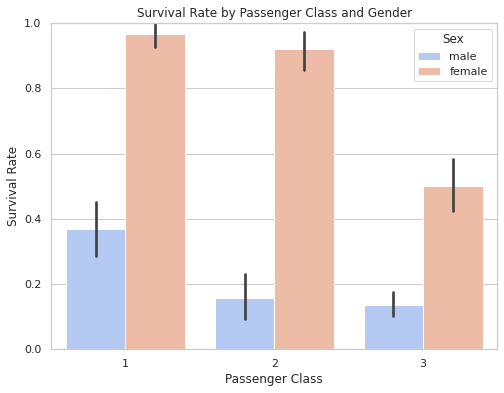

In [8]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, palette='coolwarm')

plt.title('Survival Rate by Passenger Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()


## Interpretation:
Females have higher survival rates than males in every passenger class. Survival rates decline from 1st to 3rd class, indicating socio-economic status impacted survival. Highest survival rates are for females in 1st class; lowest for males in 3rd class.


## 5.6 Correlation Heatmap of Numeric Features

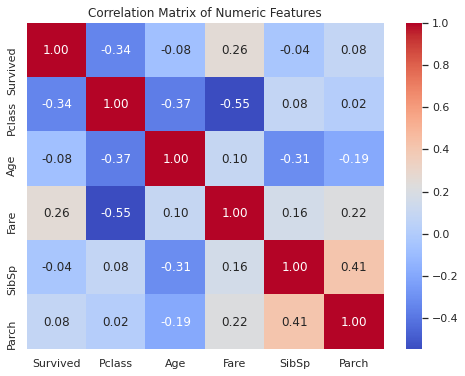

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of Numeric Features')
plt.show()


## Interpretation:
Survival negatively correlates with passenger class (Pclass) and positively correlates with Fare. Age has a small negative correlation with survival, while family-related features (SibSp, Parch) show weak correlation. This highlights Pclass and Fare as key factors related to survival.

## 5.7 Survival Count by Embarkation Point
This bar plot shows the number of Titanic passengers who survived or did not survive, broken down by embarkation point (i.e., where they boarded the ship).



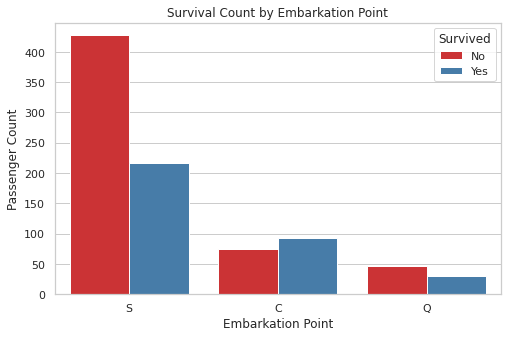

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Embarked', hue='Survived', palette='Set1')

plt.title('Survival Count by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Passenger Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


## Key Interpretations:
### Embarkation Point 'S' (Southampton):

- Most passengers boarded here.

- The majority did not survive.

- Survival numbers are still substantial but much lower than non-survivors.

### Embarkation Point 'C' (Cherbourg):

- Fewer passengers compared to 'S'.

- More passengers survived than died, suggesting a higher survival rate.

- This might correlate with more first-class passengers boarding at Cherbourg.

### Embarkation Point 'Q' (Queenstown):

- Smallest group of passengers.

- More passengers died than survived, though overall numbers are low.

### Insights:
** Southampton had the most passengers, but also the highest number of fatalities.**

** Cherbourg passengers had the best survival rate, possibly due to socioeconomic factors (more wealthy travelers).**

** Queenstown had the fewest passengers, with a low survival rate.**

## 5.8 Age vs Fare Scatter Plot Colored by Survival

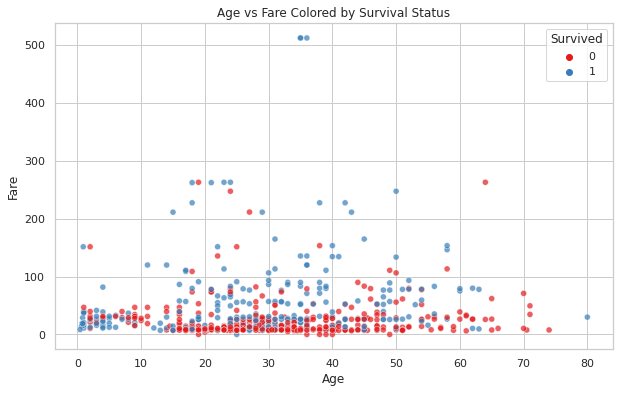

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette='Set1', alpha=0.7)

plt.title('Age vs Fare Colored by Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


## Interpretation:
Younger passengers who paid higher fares had better survival odds. There are clear clusters of survivors who paid high fares and are younger. This plot visualizes the interaction between age, socio-economic status (Fare), and survival.

## 5.9 Family Size vs Survival

In [12]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


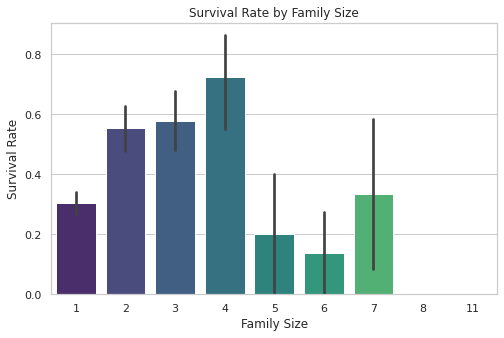

In [13]:
plt.figure(figsize=(8, 5))
sns.barplot(x='FamilySize', y='Survived', data=df, palette='viridis')

plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()


## Interpretation:
- Passengers with medium-sized families tend to have higher survival rates. Those traveling alone or with very large families show lower survival. This suggests that family support may have helped survival chances but large families could have faced challenges.